<a href="https://colab.research.google.com/github/zihadbappy/bnfake/blob/main/mBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install -Uqq wandb


In [29]:
import wandb


In [30]:
wandb.login()

True

In [31]:

wandb.init(project="bn_fake_classification", entity="zihadbappy")

In [32]:
!git clone https://github.com/zihadbappy/bnfakedata.git

fatal: destination path 'bnfakedata' already exists and is not an empty directory.


In [33]:
import pandas as pd
Dataset= pd.read_csv('/content/bnfakedata/bnfakefinal_no_duplicate.csv')

In [34]:
df = pd.DataFrame(Dataset)

In [35]:
df.groupby('label').agg('count')


,headline,content
label,,
0,2339,2339
1,2339,2338


In [36]:
df=df.dropna()

In [37]:
X=df.content
Y=df.label

In [38]:
Y.value_counts()

0    2339
1    2338
Name: label, dtype: int64

In [39]:
X.shape


(4677,)

In [40]:
!pip install -Uqq transformers datasets tqdm
!pip install -Uqq ohmeow-blurr

In [41]:
!pip install ohmeow-blurr -q

In [42]:
from fastai.text.all import *
from fastai.callback.wandb import *


from blurr.text.data.all import *


In [43]:
from blurr.text.modeling.all import *

In [44]:
from transformers import PreTrainedModel

In [45]:
from blurr.text.modeling.core import BlearnerForSequenceClassification

In [46]:
df['text']=df['content']

In [47]:
df = df.drop(['headline','content'],axis=1)

In [48]:
df.head()

,label,text
0,0,সোমবার মধ্য রাত্রে গুলশানে নিজ কার্যালয়ে আয়জিত এক অনুষ্ঠানে বৃহত্তর জামায়াতে ইসলামীর বিএনপি শাখার মহিলা আমীর জাতীয়তাবাদী শক্তির মালিক আপোষহীন দেশনেত্রী মাদারে গনতন্ত্র বেগম খালেদা জিয়া জেএসসি বংগবন্ধু লোকটাই সোনার দেশটারে ভাংগিয়া ভাগে ভাগ দুস্টু একটা বৃহত্তর জামায়াতে ইসলামীর বিএনপি শাখার আওলাদে আমীর জাতীয়তাবাদী শক্তির ভবিষ্যত মালিক একাত্তরের রেম্ব শহীদ প্রেসিডেন্ট জিয়াউর রহমানের যোগ্য উত্তরসুরী চিকিতসাধীন পলাতক মিষ্টার ফিপটিন পারসেন্ট তরুন নেতৃত্ব বড় গনতন্ত্র তারেক জিয়ার ইতিহাস উন্নয়ন কর্মসুচী উপলক্ষে আয়জিত অনুষ্ঠানে বেগম জিয়া কথা অনুষ্ঠানে মাদারে গনতন্ত্র পাকিস্তান এক আছিল জীবন আছিল মধুময়...
1,0,নিজস্ব মতিবেদক বৃহত্তর জামায়াতে ইসলামীর বিএনপি শাখার আওলাদে আমীর জাতীয়তাবাদী শক্তির ভবিষ্যত মালিক একাত্তরের রেম্ব শহীদ প্রেসিডেন্ট জিয়াউর রহমানের যোগ্য উত্তরসুরী চিকিতসাধীন পলাতক মিষ্টার ফিপটিন পারসেন্ট তরুন নেতৃত্ব বড় গনতন্ত্র তারেক জিয়াকে বাংলার ফিডাল কেষ্ট্র উপাধিতে ভুষিত বৃহত্তর জামায়াতের বিএনপি শাখার ভাঁড়প্রাপ্ত নায়েবে আমীর জাতীয়তাবাদী শক্তির কমপ্লান বয় বড় গুন্ডে কতৃক হাইড এন্ড সিক কলংকে ভুষিত মির্জা বাড়ির বড় গৌরব মির্জা ফখরুল ইসলাম আগুনগীর ওরফে ফখা ইবনে চখা কষ্ট কেষ্ট্র মিলে কষ্ট করিয়াছি বড় গুণ্ডের নেয় একজন তরুন নেতৃত্বকে বাংলার কেষ্ট্র রুপে পাইছি থাকলে সকালটা মিস্টি সোমবার দুপুরে জা...
2,0,নিজস্ব মতিবেদক রাজনীতীবীদদের ক্ষোভ প্রকাশ ইতিহাসে মুল্যে আংগুল দেওয়ার আহোভান জানিয়ে উপমহাদেশের বিখ্যেত ইতিহাসবীদ কলামিষ্ট গান্ধীবাদী আন্দোলনের প্রবাদ পুরুষ সৈয়দ আবুল মকসুদ ইতিহাসকে পয়সার রাজনীতীর বাইরে রাখুন শুক্রবার সকালে নিজ বাস ভবনে আয়জিত এক সংবাদ সম্মেলনে আহোভান জানান মকসুদ সময় পোষা ছাগল পুটু সংবাদ সম্মেলনে উপস্থিত ইতিহাসবীদ মকসুদ মাস ধরিয়া হইছে এক খেল উপমহাদেশের বিখ্যেত ইতিহাসবীদ কলামিষ্ট গান্ধীবাদী আন্দোলনের প্রবাদ পুরুষরা আছি তাহাদের কুন পাত্তা দিয়া তাহাদের সংগে পরামিশ করিয়া তাহাদের উপযুক্ত হাদিয়া দিয়া কতিপয় রাজনীতীবীদ দেশে বিদেশে বসিয়া ইতিহাসে মুল্যে আংগুল দিতেছেন আবেগঘন কণ্ঠে মকস...
3,0,নিজস্ব মতিবেদক বৃহত্তর জামায়াতে ইসলামীর বিএনপি শাখার আওলাদে আমীর জাতীয়তাবাদী শক্তির ভবিষ্যত মালিক একাত্তরের রেম্ব শহীদ প্রেসিডেন্ট জিয়াউর রহমানের যোগ্য উত্তরসুরী চিকিতসাধীন পলাতক মিষ্টার ফিপটিন পারসেন্ট তরুন নেতৃত্ব বড় গনতন্ত্র তারেক জিয়ার ইতিহাস উন্নয়ন প্রকল্প মন্তব্য সংকল্প বেক্ত খেতনামা ড্রন বিশেষজ্ঞ মস্তফা অনুরাগী কাপড় বেবসায়ী ইসলামী বেংকের সমঝদার হরলিকস পাগলা বিতর্ক রাজ আল্লামা আবদুন নুর তুষার ন কমেন্টস এক সংবাদ সম্মেলনে তুষার কথা বিতর্ক রাজ দুনিয়ার বিষয়ে জ্ঞেন বিতরন কথা সত্য বিষয়ে কুন কথা বলব বিষয়টি হইতেছে বড় গুণ্ডে তারেক জিয়া আবেগঘন কণ্ঠে হরলিকস পাগলা তুষার মাঝে আমারও ত ইচ্ছা ইসলামী...
4,0,দিল্লী মতিনিধি দিল্লীর রাজপথে লোকসভা নির্বাচনের প্রচারনা চালানর সময় জনৈক অট রিকশা চালকের চড় খেয়ে পুলিশের ক্ষিপ্ত হয়েছেন দিল্লীর পদত্যেগ কারী মুখ্য মন্ত্রী আম আদমী পার্টির আমীর অরবীন্দ্র কেজরিওয়াল দিল্লীর বেস্ত সড়কে অট রিকশা চালকদের আম আদমী পার্টিতে ভোট দেওয়ার আহোভান জানানর সময় লাল বাহাদুর লালি নামক জনৈক অট রিকশা চালক অট রিকশা নেমে অরবীন্দ্র কেজরিওয়ালের গালে চড় মারেন কেজরিওয়ালের সংগে আম আদমী পার্টির সদস্যরা মহাত্মা গান্ধীর অহিংস নীতী পরিত্যেগ লাল বাহাদুর লালিকে উত্তম মধ্যম দিয়ে হাসপাতালে পাঠান চড় খেয়ে মন খারাপ অরবীন্দ্র কেজরিওয়াল লাল বাহাদুর লালির চড়ের আঘাতে আহত কেজরিওয়াল এক টুইটার বার্তায় ...


In [49]:
pretrained_model_name = "bert-base-multilingual-cased"
learn = BlearnerForSequenceClassification.from_data(df, pretrained_model_name, dl_kwargs={ 'bs': 4})

SuggestedLRs(minimum=0.0033113110810518267, steep=0.02290867641568184, valley=0.004365158267319202, slide=0.002511886414140463)

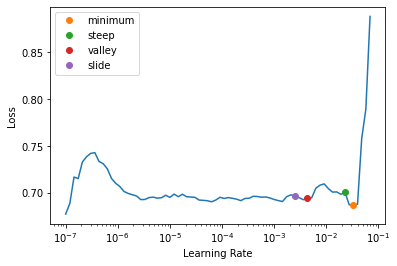

In [50]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [51]:
#learn.unfreeze()
learn.fit_one_cycle(10, lr_max=1e-3,cbs=[WandbCallback(log_preds=False, log_model=False)])

Could not gather input dimensions


epoch,train_loss,valid_loss,f1_score,accuracy,time
0,0.399127,0.573605,0.805996,0.764706,04:23
1,0.327428,0.378131,0.877810,0.866310,04:23
2,0.322465,0.277216,0.891542,0.883422,04:24
3,0.298342,0.461233,0.832442,0.798930,04:23
4,0.240705,0.201752,0.926471,0.925134,04:23
5,0.170228,0.179274,0.932782,0.930481,04:23
6,0.169032,0.201514,0.925403,0.920856,04:24
7,0.129680,0.167660,0.935722,0.934759,04:23
8,0.100256,0.171784,0.937759,0.935829,04:23
9,0.103150,0.175891,0.938860,0.936898,04:23


In [52]:
learn.show_results(learner=learn, max_n=4,trunc_at=200)

,text,target,prediction
0,ঘুঘু প্রতিদিন উঁচু ঘন ঢাকা সারু গাছের মগডালে স্থির নিঃশব্দে অধীর আগ্রহে অপেক্ষা কখন এক ঝলক দেখবে ফল বাগানের দিক রঙিন ভর বিশাল আকাশের বুকে অমনোযোগীর অলস ভঙ্গিতে আসে ভালোবাসার নীল ডুব চোখ ধাঁধানো চকমকে,1,0
1,দুর্দান্ত কাপের তম আসরের সুপার ফোরে ম্যাচে পাকিস্তানের উইকেটে হেরেছে আফগানিস্তান শেষ ওভারে স্বাদ পাকিস্তান পাকিস্তানের প্রধান ভূমিকা রাখেন ইমামউলহক বাবর আজম মালিক ম্যাচ শেষে তিন প্রশংসা পাকিস্তানের সর,1,1
2,আপনাকে মন্ত্রিসভার সদস্যদের অভিনন্দন জানাতে অন্যদিকে গত দশ বছর অবিরাম অভিনন্দন শুভেচ্ছা অভিধানের শব্দমালার ফুল শব্দ বাক্য বারবার মন্ত্রীর দৃষ্টিআকর্ষণ করাও কঠিন অভিনন্দন জানানোর শিল্পটি উঠেছে প্রতিদ্ব,0,0
3,বাংলার ফেসবুকে হাজারো মানুষ ফেক আইডির বাস শ্রেণী অলৌকিক ক্ষমতাধর শ্রেণীকে অনলাইনফেসবুক বুদ্ধিজীবী জানেন বোঝেন অনুভূতি ক কলিকাতা দেখলেই বোঝেন সাপ সিনেমার একটা দৃশ্যের ছবি দেখেই সিনেমার গল্প উদ্দেশ্য মো,0,0


In [53]:
wandb.finish()


accuracy,▁▅▆▂██▇███
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_3,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
f1_score,▁▅▆▂▇█▇███
lr_0,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_1,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_2,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_3,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁


In [54]:
!sudo apt-get install git-lfs


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
